In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
data = data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
print(data.dtypes, data.nunique())

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
M

In [15]:
# as we can see that there are 6531 unique values in Total charges however the data type is object so we will change it to inter

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# lets check the null values
data.isna().sum()

# we have 11 missing vlaues so we will delete missing values
data.dropna(inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


,Total,Male,Female,percent_male
No,5163,2619,2544,50.726322
Yes,1869,930,939,49.759230


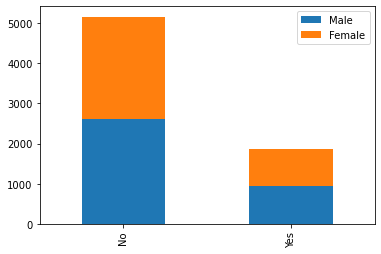

In [17]:
x = pd.DataFrame()
x['Total'] = data['Churn'].value_counts()
x['Male'] = data[data.gender == 'Male']['Churn'].value_counts()
x['Female'] = data[data.gender == 'Female']['Churn'].value_counts()
x[['Male','Female']].plot(kind='bar',stacked=True)
x['percent_male'] = (x['Male'] / x['Total'])*100
x

,Total,0,1,percent_SC
No,5163,4497,666,12.899477
Yes,1869,1393,476,25.468165


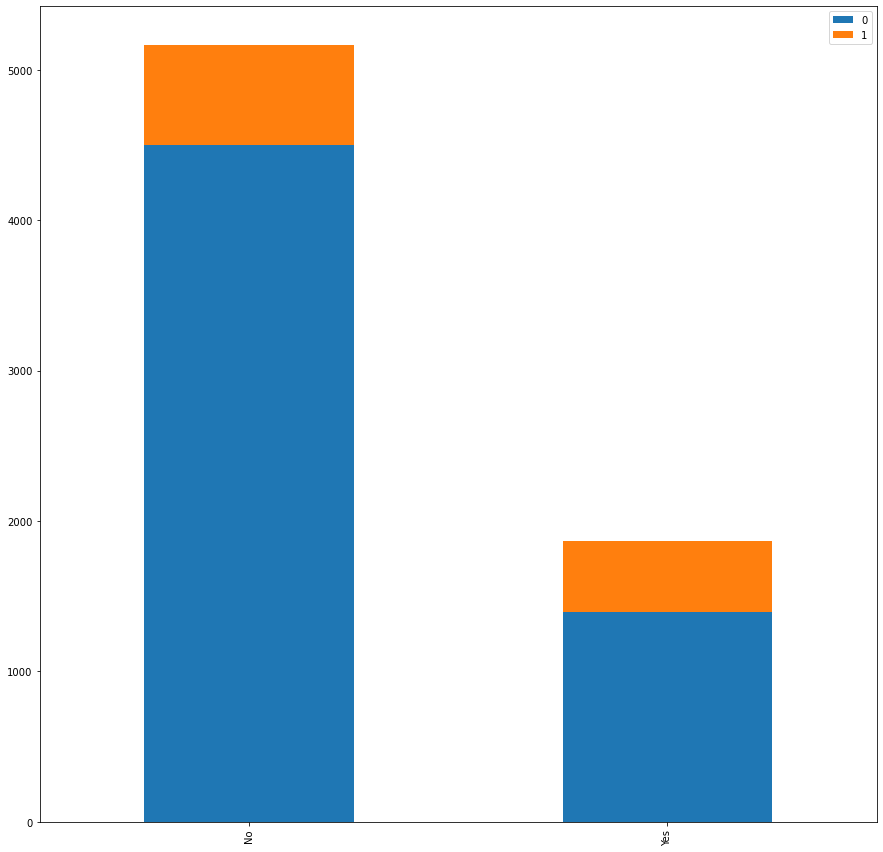

In [18]:
x = pd.DataFrame()
x['Total'] = data['Churn'].value_counts()
x['0'] = data[data.SeniorCitizen == 0]['Churn'].value_counts()
x['1'] = data[data.SeniorCitizen == 1]['Churn'].value_counts()
x[['0','1']].plot(kind='bar',stacked=True,figsize=(15,15))
x['percent_SC'] = (x['1'] / x['Total'])*100
x

it seems that senior citizen re more likely to leave the company

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

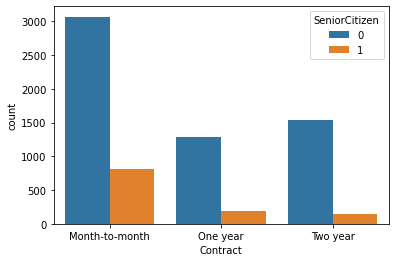

In [19]:
sns.countplot(data['Contract'],hue=data['SeniorCitizen'])
data['Contract'].value_counts()

senior citizen are more likely to get month to month contract 

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

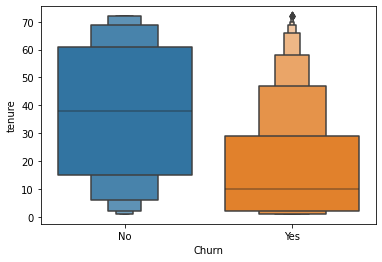

In [21]:
sns.boxenplot(x=data['Churn'],y=data['tenure'])

New customer are more likly to leave the company 

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

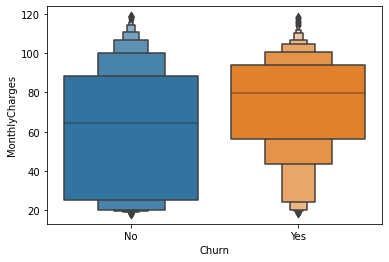

In [22]:
sns.boxenplot(x=data['Churn'],y=data['MonthlyCharges'])

Customer who have higher monthly charges are more likely to leave the company

In [23]:
# lets divide the dataset based on fraud reported for better analysis
data_Y = data[data.Churn =='Yes']
data_N = data[data.Churn =='No']
data_Y

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


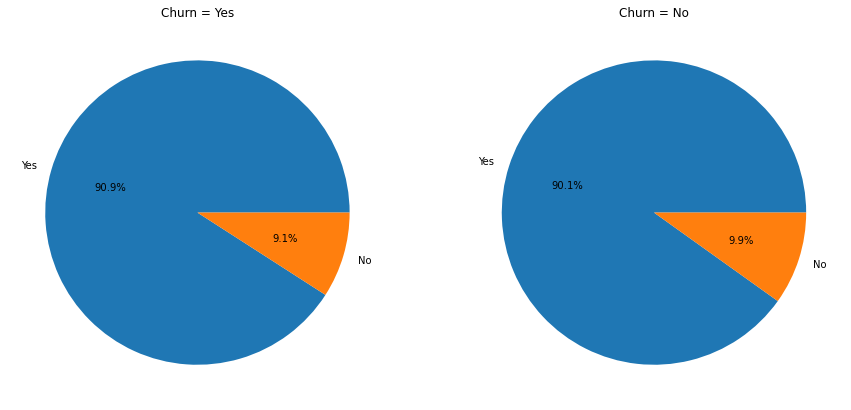

<Figure size 720x720 with 0 Axes>

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['PhoneService'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['PhoneService'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['PhoneService'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

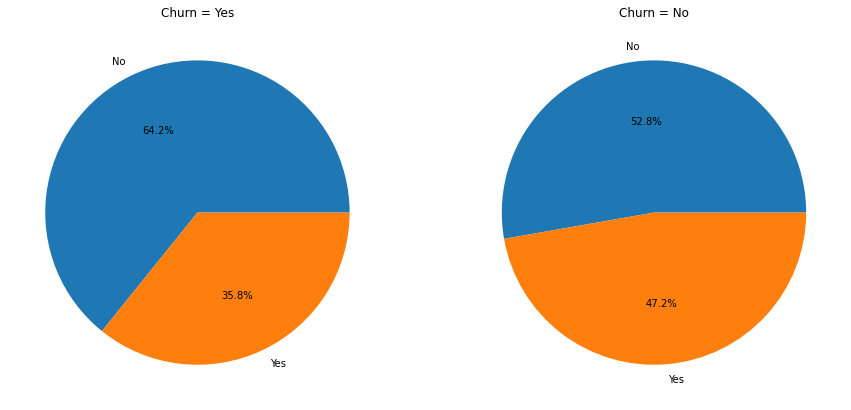

<Figure size 720x720 with 0 Axes>

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['Partner'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['Partner'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['Partner'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

customer who have partner are more likley to stay

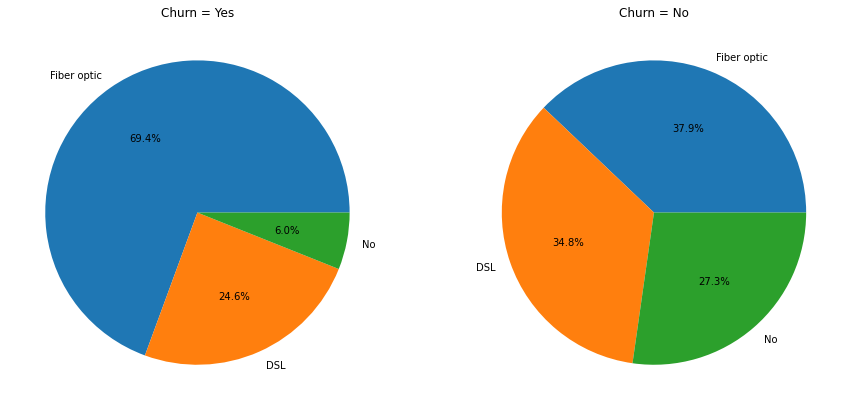

<Figure size 720x720 with 0 Axes>

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['InternetService'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['InternetService'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['InternetService'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

most of the fiber optic user are leaving the company

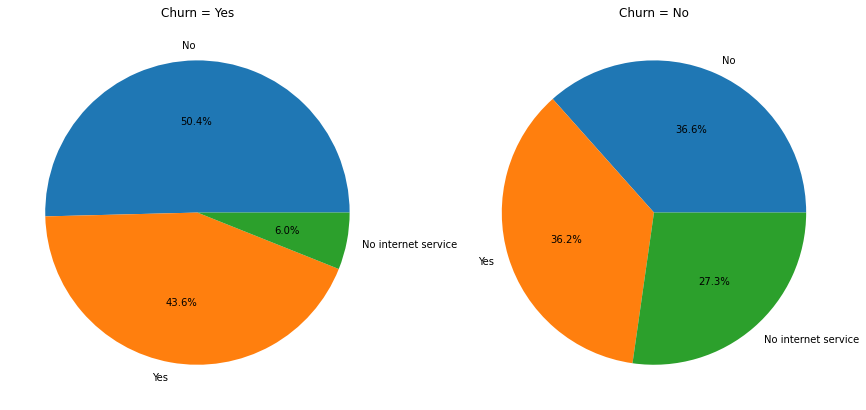

<Figure size 720x720 with 0 Axes>

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['StreamingTV'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['StreamingTV'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['StreamingTV'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

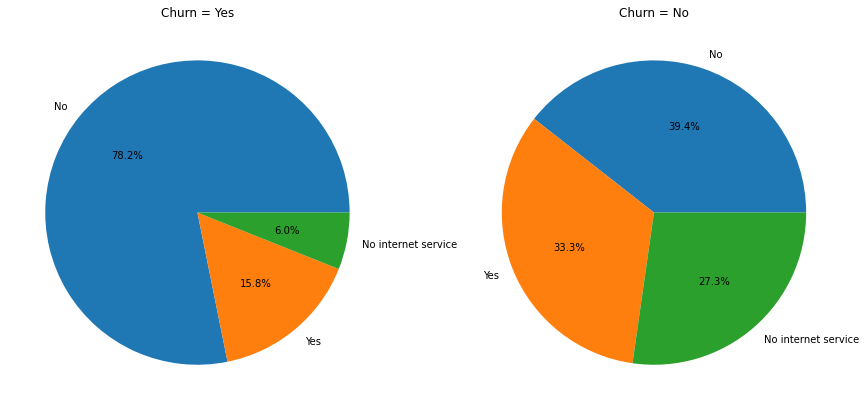

<Figure size 720x720 with 0 Axes>

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['OnlineSecurity'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['OnlineSecurity'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['OnlineSecurity'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

based on the above two chart it is significant that most of the internet user are likly to leave the company

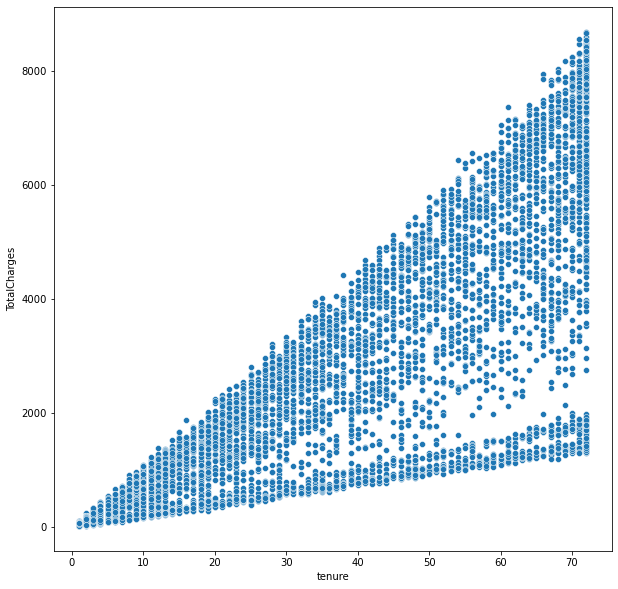

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['TotalCharges'],x=data['tenure'])
plt.show()

as we can see that tenure and total charegs are positviley correlated it means that the customer who satys longer with the company are more likley to have higher total charges

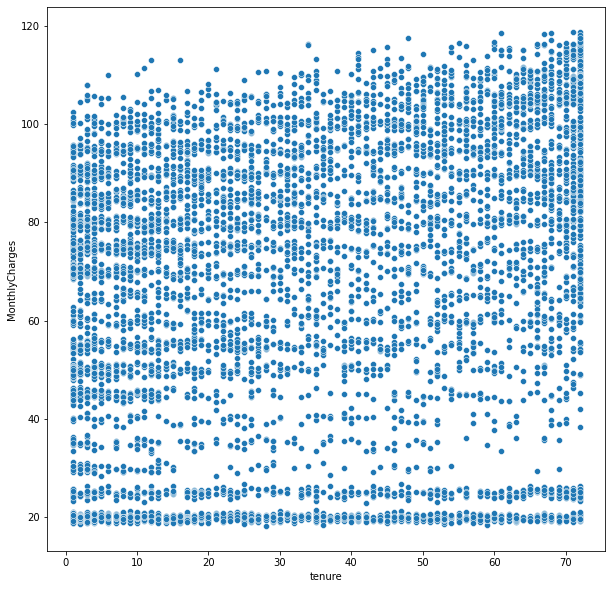

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=data['MonthlyCharges'],x=data['tenure'])
plt.show()

here we cant find any trend between monthly charges and tenure and we have also discovered that all those customer who have monthly charges higher are more likley to leave so we can conclude that:
   - its not total charges but monthly charges that impacts a consumer leaving the company 

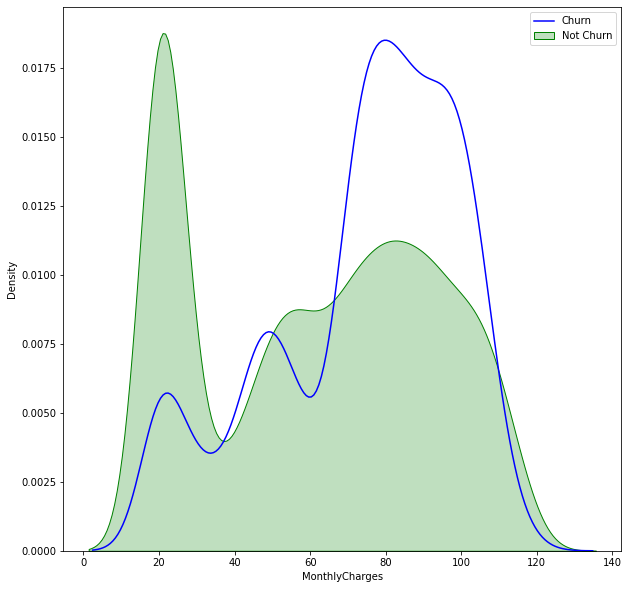

In [48]:
plt.figure(figsize=(10,10))
sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],color='Green',shade=True)
sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],color="Blue")
plt.legend(['Churn','Not Churn'])

it is confirmed tht people higher monthly charges are more likely to leave the company

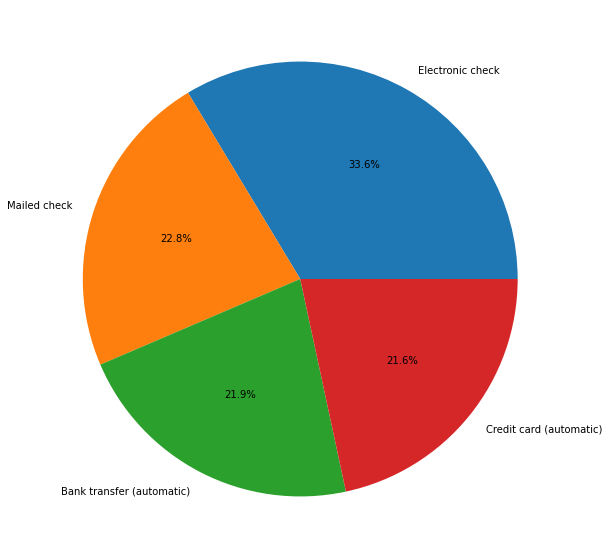

In [127]:
x = data['PaymentMethod'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(data['PaymentMethod'].value_counts(), labels = x,autopct='%1.1f%%')
plt.show()

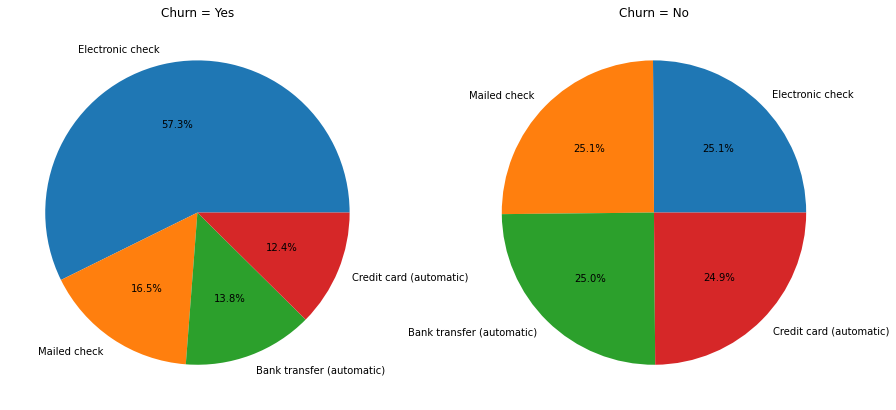

<Figure size 720x720 with 0 Axes>

In [128]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,15))
x = data['PaymentMethod'].value_counts().index
plt.figure(figsize=(10,10))
ax1.pie(data_Y['PaymentMethod'].value_counts(), labels = x,autopct='%1.1f%%')
ax1.set_title('Churn = Yes')
ax2.pie(data_N['PaymentMethod'].value_counts(), labels = x,autopct='%1.1f%%')
ax2.set_title('Churn = No')
plt.show()

when we compare above three pie charts:
 - company have proper mix of user using different mode of payments
 - however fo all the consumer who left the company around 58% of consumer used Electronic check as their preferred mode of payment

# Data Preprocessing

In [129]:
# lets check the unique values of all the object type columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [137]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i, ' ----', data[i].unique(),'\n')

gender  ---- ['Female' 'Male'] 

Partner  ---- ['Yes' 'No'] 

Dependents  ---- ['No' 'Yes'] 

PhoneService  ---- ['No' 'Yes'] 

MultipleLines  ---- ['No phone service' 'No' 'Yes'] 

InternetService  ---- ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  ---- ['No' 'Yes' 'No internet service'] 

OnlineBackup  ---- ['Yes' 'No' 'No internet service'] 

DeviceProtection  ---- ['No' 'Yes' 'No internet service'] 

TechSupport  ---- ['No' 'Yes' 'No internet service'] 

StreamingTV  ---- ['No' 'Yes' 'No internet service'] 

StreamingMovies  ---- ['No' 'Yes' 'No internet service'] 

Contract  ---- ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling  ---- ['Yes' 'No'] 

PaymentMethod  ---- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn  ---- ['No' 'Yes'] 



In [54]:
# tweaking the catergorical to readuces the  no of varible
data['MultipleLines'].replace('No phone service','No',inplace=True)
data['OnlineSecurity'].replace('No internet service','No',inplace=True)
data['OnlineBackup'].replace('No internet service','No',inplace=True)
data['DeviceProtection'].replace('No internet service','No',inplace=True)
data['TechSupport'].replace('No internet service','No',inplace=True)
data['StreamingTV'].replace('No internet service','No',inplace=True)
data['StreamingMovies'].replace('No internet service','No',inplace=True)

In [55]:
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i, ' ----', data[i].unique(),'\n')

gender  ---- ['Female' 'Male'] 

Partner  ---- ['Yes' 'No'] 

Dependents  ---- ['No' 'Yes'] 

PhoneService  ---- ['No' 'Yes'] 

MultipleLines  ---- ['No' 'Yes'] 

InternetService  ---- ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  ---- ['No' 'Yes'] 

OnlineBackup  ---- ['Yes' 'No'] 

DeviceProtection  ---- ['No' 'Yes'] 

TechSupport  ---- ['No' 'Yes'] 

StreamingTV  ---- ['No' 'Yes'] 

StreamingMovies  ---- ['No' 'Yes'] 

Contract  ---- ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling  ---- ['Yes' 'No'] 

PaymentMethod  ---- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

Churn  ---- ['No' 'Yes'] 



Now I will use label encode of all those categorical column who have two values

In [56]:
from sklearn.preprocessing import LabelEncoder

data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])
data['MultipleLines'] = LabelEncoder().fit_transform(data['MultipleLines'])
data['OnlineSecurity'] = LabelEncoder().fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = LabelEncoder().fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = LabelEncoder().fit_transform(data['DeviceProtection'])
data['TechSupport'] = LabelEncoder().fit_transform(data['TechSupport'])
data['StreamingTV'] = LabelEncoder().fit_transform(data['StreamingTV'])
data['StreamingMovies'] = LabelEncoder().fit_transform(data['StreamingMovies'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


for all those columns who have more than two variables we will use get dummies encoder

In [75]:
x = pd.get_dummies(data['InternetService'],prefix='InternetService_')
y = pd.get_dummies(data['Contract'],prefix='Contract_')
z = pd.get_dummies(data['PaymentMethod'],prefix='PaymentMethod_')
data = pd.concat([data,x,y,z],axis=1)

In [ ]:
data.drop(columns=['InternetService','Contract','PaymentMethod'],inplace=True)
data

<AxesSubplot:>

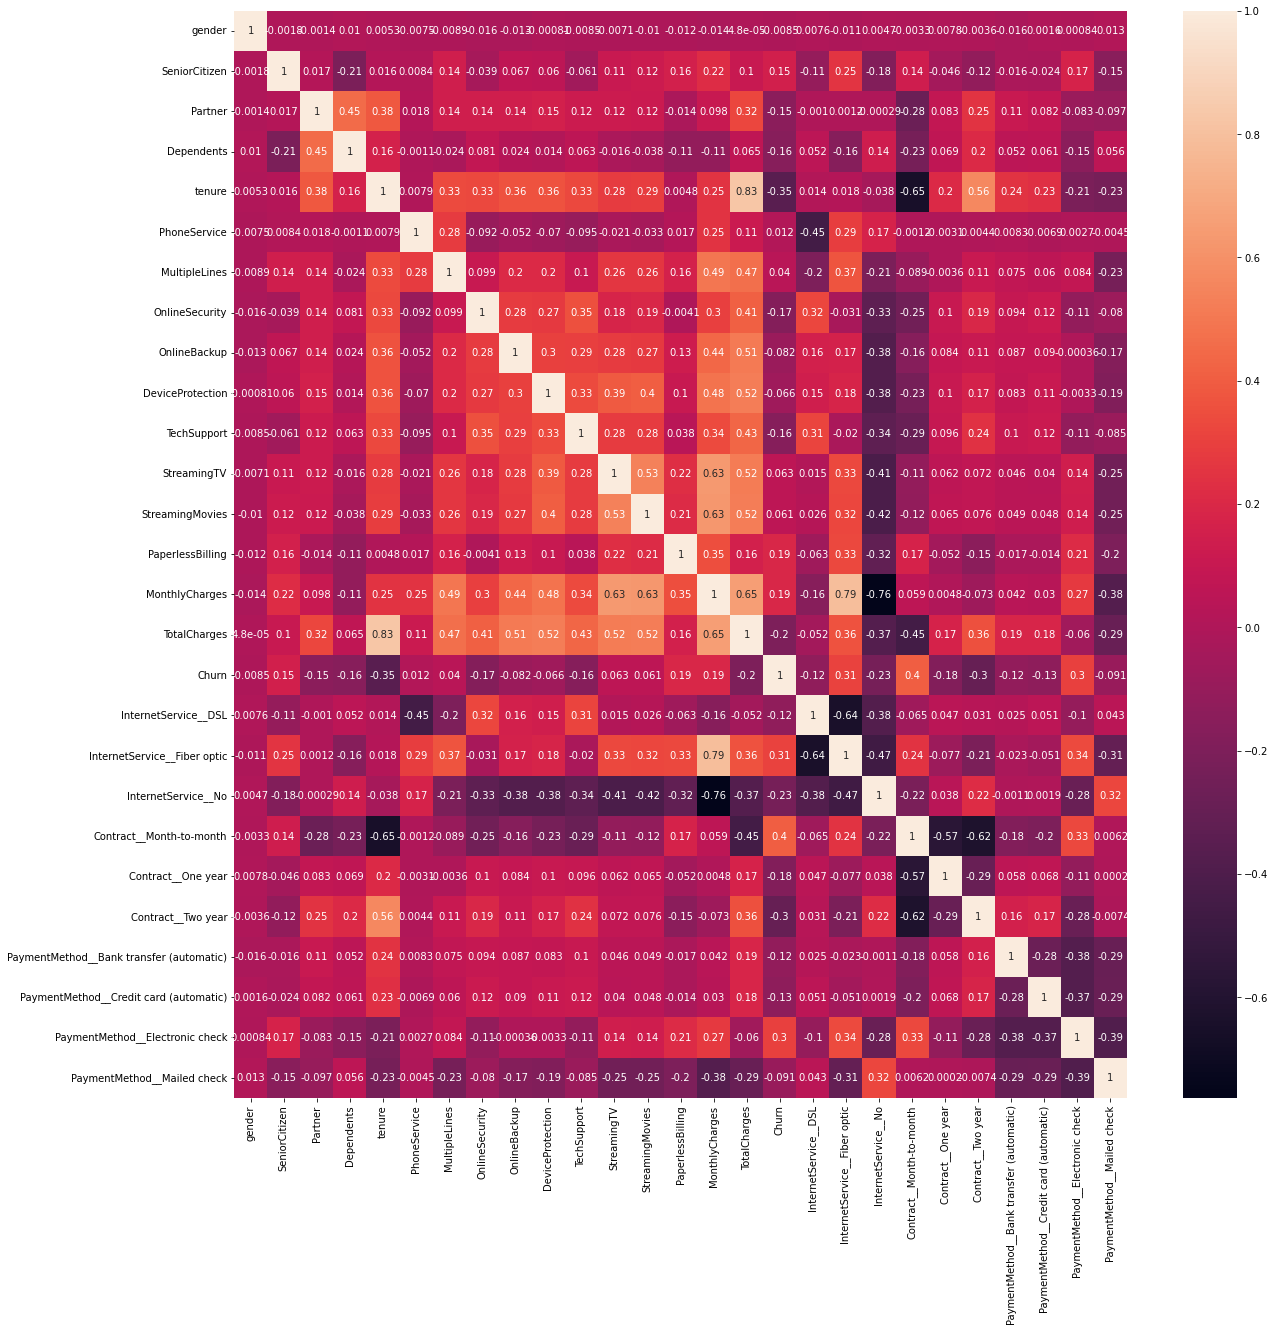

In [98]:
# lets check for the multicolinearity for the data
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

No signs of multicolineartity found

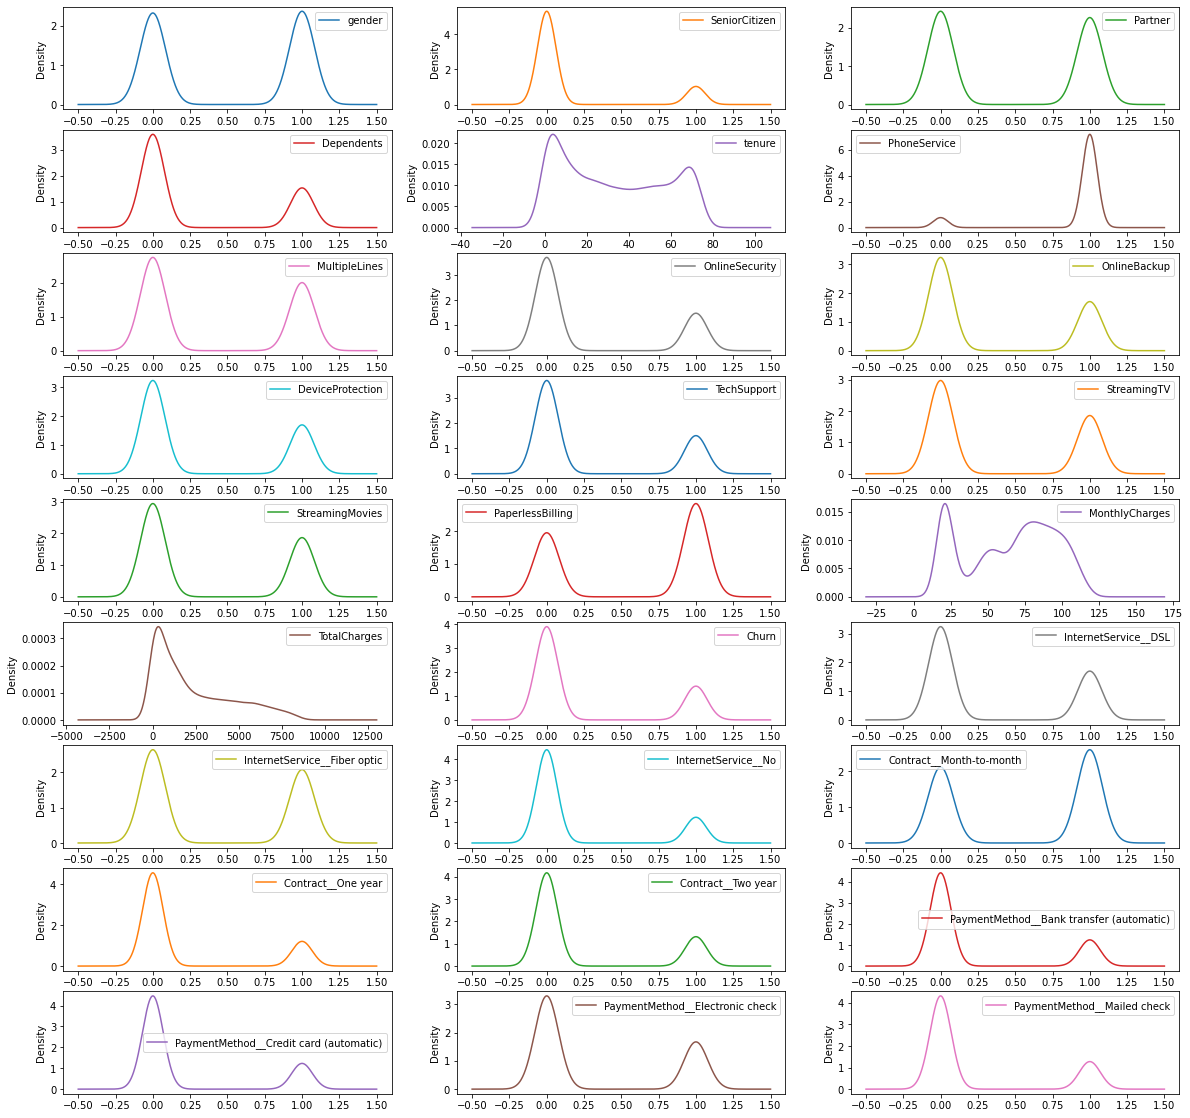

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64


In [100]:
# Check for the distribtuion of the data
data.plot(kind='density',figsize=(20,20),subplots=True,layout=(9,3),sharex=False)
plt.show()
print(data[['tenure','MonthlyCharges','TotalCharges']].skew())

Data looks normally distributed however, total charges is little bit skewed we will treat it further

# balancing the dataset

0    5163
1    1869
Name: Churn, dtype: int64


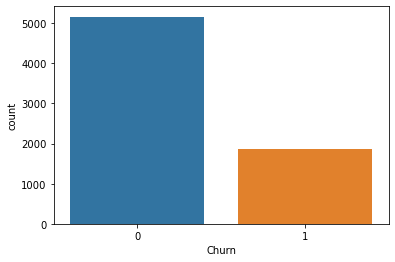

In [177]:
sns.countplot(x=data['Churn'],data=data)
print(data['Churn'].value_counts())

In [208]:
# as the data is unbalanced we will be balancing the dataset using resampling techniques

from sklearn.utils import resample
data_yes = data[data.Churn==1]
data_no = data[data.Churn==0]

data_yes = resample(data_yes,replace=True,n_samples=4850,random_state=25)

data_new = pd.concat([data_yes,data_no])

0    5163
1    4850
Name: Churn, dtype: int64


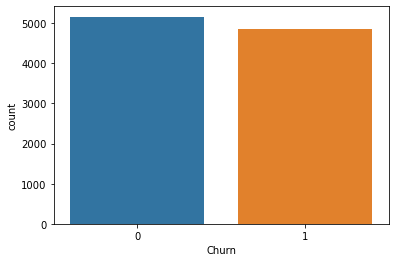

In [209]:
sns.countplot(x=data_new['Churn'],data=data)
print(data_new['Churn'].value_counts())

In [210]:
data_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
4424,1,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1223,0,0,0,0,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1822,0,0,0,1,31,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
580,0,0,1,1,12,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5111,1,1,0,0,47,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


# spliting the data

In [211]:
X = data_new.drop(columns='Churn')
y = data_new['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService__DSL,InternetService__Fiber optic,InternetService__No,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
4424,1,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1223,0,0,0,0,2,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1822,0,0,0,1,31,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
580,0,0,1,1,12,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
5111,1,1,0,0,47,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


we have 26 features which is long list so we will reduce some feature by applying feature reduction techniques

### Feature reduction using chi-square

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

spercentile = SelectPercentile(score_func=chi2, percentile=75)
spercentile = spercentile.fit(X,y)

col = spercentile.get_support(indices=True)
features = X.columns[col]

print(features)
print(col)
print(len(col))

X = X[features]

X

0.4236089449004301


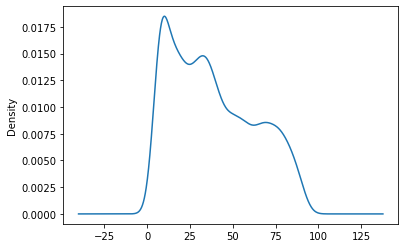

In [212]:
# removing skewness from total charges column using sqroot technique

X['TotalCharges'] = np.sqrt(X['TotalCharges'])
X['TotalCharges'].plot(kind='density')
print(X['TotalCharges'].skew())

skewness has been removed

# scaling the data

In [213]:
# scaled data using standard scalar
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[ 0.99591367, -0.48691806, -0.89928118, ..., -0.48188959,
         1.20663687, -0.51515636],
       [-1.00410309, -0.48691806, -0.89928118, ..., -0.48188959,
         1.20663687, -0.51515636],
       [-1.00410309, -0.48691806, -0.89928118, ...,  2.07516416,
        -0.82874975, -0.51515636],
       ...,
       [-1.00410309, -0.48691806,  1.11199925, ...,  2.07516416,
        -0.82874975, -0.51515636],
       [-1.00410309, -0.48691806,  1.11199925, ..., -0.48188959,
         1.20663687, -0.51515636],
       [ 0.99591367, -0.48691806, -0.89928118, ..., -0.48188959,
        -0.82874975, -0.51515636]])

All the preprocessing of the data has been done, now we will train the model

I will be using follwoing model for prediction:
    
    Logisitics Regression
    DecsionTree
    Random Forest
    Knn

###### Identifying best random state for logisitics regression

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7503744383424863 random state - 0
Accurancy Score -  0.7593609585621568 random state - 1
Accurancy Score -  0.7723414877683474 random state - 3
Accurancy Score -  0.7833250124812781 random state - 6


###### Confusion matrix and clssification report - Logistics Regression

In [215]:
#the random state from logisitics regression is 99, so we will use to generate confusion matrix and classification report
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=6)
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = lm.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 78.33250124812781 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      1031
           1       0.77      0.78      0.78       972

    accuracy                           0.78      2003
   macro avg       0.78      0.78      0.78      2003
weighted avg       0.78      0.78      0.78      2003

[[810 221]
 [213 759]]


###### Identifying best random state for KNN

In [216]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7708437343984024 random state - 0
Accurancy Score -  0.7733399900149776 random state - 1
Accurancy Score -  0.7773339990014978 random state - 3
Accurancy Score -  0.782825761357963 random state - 4
Accurancy Score -  0.7853220169745382 random state - 6
Accurancy Score -  0.7908137793310035 random state - 20
Accurancy Score -  0.7958062905641538 random state - 56
Accurancy Score -  0.7963055416874688 random state - 93


###### Confusion matrix and clssification report - KNN

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=93)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = knn.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 79.63055416874688 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1046
           1       0.74      0.88      0.80       957

    accuracy                           0.80      2003
   macro avg       0.80      0.80      0.80      2003
weighted avg       0.81      0.80      0.80      2003

[[756 290]
 [118 839]]


###### Identifying best random state for Decision Tree

In [219]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8671992011982027 random state - 0
Accurancy Score -  0.8811782326510235 random state - 3
Accurancy Score -  0.8821767348976535 random state - 4
Accurancy Score -  0.8831752371442836 random state - 82


###### Confusion matrix and clssification report - Decision Tree

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=82)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = dt.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 88.41737393909136 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1017
           1       0.85      0.93      0.89       986

    accuracy                           0.88      2003
   macro avg       0.89      0.88      0.88      2003
weighted avg       0.89      0.88      0.88      2003

[[850 167]
 [ 65 921]]


###### Identifying best random state for Random Forest

In [221]:
# best the best random state for Logistic regrssion model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8951572641038442 random state - 0
Accurancy Score -  0.8986520219670494 random state - 3
Accurancy Score -  0.9036445332001997 random state - 4
Accurancy Score -  0.9056415376934598 random state - 6
Accurancy Score -  0.9061407888167748 random state - 13
Accurancy Score -  0.9151273090364453 random state - 20
Accurancy Score -  0.9161258112830754 random state - 86


###### Confusion matrix and clssification report - Random Forest

In [232]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=86)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 91.96205691462805 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       990
           1       0.90      0.95      0.92      1013

    accuracy                           0.92      2003
   macro avg       0.92      0.92      0.92      2003
weighted avg       0.92      0.92      0.92      2003

[[880 110]
 [ 51 962]]


###### AUC ROC Curve

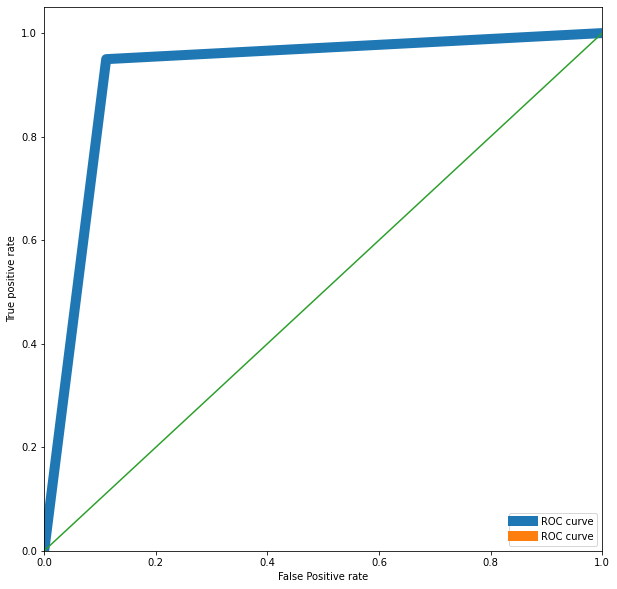

In [234]:
plt.figure(figsize=(10,10))
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')

##### Hyper Parameter tuning

In [236]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'min_samples_split': range(1,5),'max_depth':range(1,5)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [237]:
ri = 0
acc = 0
for i in range(1,100):
    rf = RandomForestClassifier(criterion='gini', max_depth=4, min_samples_leaf=3,min_samples_split=3,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_pred,y_test)

    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7688467299051422 random state - 1
Accurancy Score -  0.7703444832750874 random state - 8
Accurancy Score -  0.7708437343984024 random state - 13
Accurancy Score -  0.7718422366450325 random state - 14
Accurancy Score -  0.7733399900149776 random state - 18
Accurancy Score -  0.7743384922616076 random state - 99


In [270]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=86)
rf = RandomForestClassifier(criterion='entropy', max_depth=500, min_samples_leaf=1,min_samples_split=2,random_state=99)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 91.0134797803295 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       990
           1       0.88      0.95      0.91      1013

    accuracy                           0.91      2003
   macro avg       0.91      0.91      0.91      2003
weighted avg       0.91      0.91      0.91      2003

[[864 126]
 [ 54 959]]


In [281]:
# we are not able to improve result from Hyper Parameter tuning so we will use the original model
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=86)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy Score --- 91.76235646530205 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       990
           1       0.90      0.95      0.92      1013

    accuracy                           0.92      2003
   macro avg       0.92      0.92      0.92      2003
weighted avg       0.92      0.92      0.92      2003

[[878 112]
 [ 53 960]]


In [ ]:
import pickle

filename = 'final_model.pkl'
pickle.dump(rf, open('rf.pkl', 'wb'))